<a href="https://colab.research.google.com/github/anu170483-cmyk/house-price-prediction-xgboost/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



Uploading files

In [ ]:
from google.colab import files
uploaded=files.upload()



Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques (1).zip


Unzipping the zip files

In [ ]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['house-prices-advanced-regression-techniques (1).zip']),'r') as zip_ref:
  zip_ref.extractall()
  print("extracted files:",zip_ref.namelist())

import pandas as pd
df=pd.read_csv('train.csv')
df.head(10)

extracted files: ['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
###handling missing values
df.fillna(df.median(numeric_only=True),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,1,2008,WD,Normal,118000


In [ ]:

### Selecting top correlated features and also categorical features
features = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
    "YearBuilt"
]

categorical_features = [
    "Neighborhood", "ExterQual", "KitchenQual", "BsmtQual", "GarageFinish"
]

###One-hot encode for categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df[features + [col for col in df.columns if any(c in col for c in categorical_features)]]
y = df["SalePrice"]


###train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#### standardisation

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Save the column names before scaling
feature_names = X.columns

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
### Model training
### xgbRegression model
from xgboost import XGBRegressor

xgb_model =XGBRegressor(
    n_estimators=500,     # number of trees
    learning_rate=0.05,   # step size shrinkage
    max_depth=6,          # depth of trees
    subsample=0.8,        # random sampling of training data
    colsample_bytree=0.8, # random sampling of features
    random_state=42)
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
### prediction
y_pred=xgb_model.predict(X_test)


In [ ]:
### evaluation
print("XBG Regression R2:", r2_score(y_test, y_pred))
print("XGB Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



XBG Regression R2: 0.897675633430481
XGB Regression RMSE: 28015.377491656258


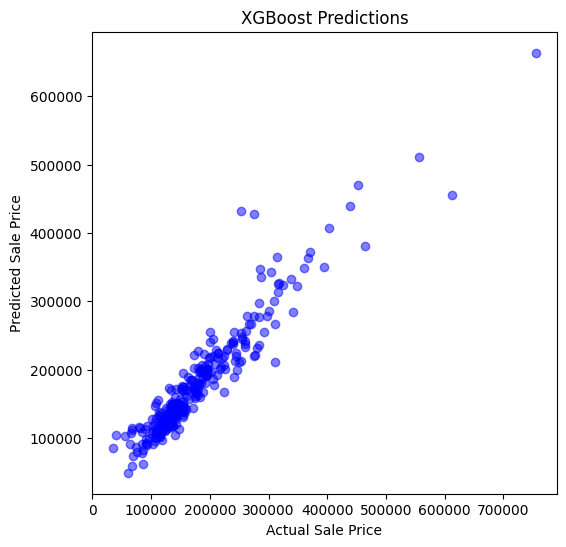

In [ ]:
### Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("XGBoost Predictions")
plt.show()


In [ ]:
import pandas as pd
X_train = pd.DataFrame(X_train, columns=X.columns)


In [ ]:
import joblib # Save the list of 44 feature names
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']

In [ ]:
from google.colab import files
files.download("feature_names.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save trained XGBoost model to a .pkl file
joblib.dump(xgb_model, "house_price_model.pkl")

['house_price_model.pkl']

In [ ]:
from google.colab import files

# Download the model file
files.download("house_price_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>